## Classification of movie reviews
--> Binary classification on IMDB dataset
<br>--> We have 50000 input reviews
<br>--> We will classify review as positive or negative

In [1]:
from keras.datasets import imdb
# we are using imdb dataset of keras

## Data Preparation

In [36]:
((XT,YT),(Xt,Yt))=imdb.load_data(num_words=10000) 
# 10000 is basically the number of unique words, ie. vocabulary size is 10000
# so the first most relevant 10000 words will be used.

In [37]:
len(XT)
# XT --> X_train
# ie. half of the reviews will be in training set.

25000

In [38]:
len(Xt)
# Xt --> X-test
# and rest half reviews in test set.

25000

In [39]:
print(XT[0])
# these numbers are nothing but the index of the words of first review present in vocab.

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [40]:
word_idx=imdb.get_word_index()
# this method is used to retrieve those words present at the above indices.

In [41]:
# print(word_idx.items())
# index of every word

### To get the actual review:
1.first we will create a reverse dictionary<BR>
2.then iterate over all index of that review and retrieve the words

In [42]:
idx_word= dict([value,key] for (key,value) in word_idx.items())

In [43]:
# print(idx_word.items())
# reverse dictionary

In [44]:
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
# in above .get() method, we passes the key(index) value of dictionary and then it will return the value at that key.
# idx-3.. why? ---> because when the vocabulary is created, it also add 3 words on top of it. And these are: 1) <pad> word
                    # 2) <S> start of sentence and 3) <UNK> for unknown words


In [45]:
print(actual_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

#### Next Step --> Vectorize the data
#### Vocab size --> 10000, we will make every sentence as represented by a vector of len 10000. Eg:  [000111000...110000100]

In [46]:
import numpy as np

In [47]:
len(XT[0])
# length of 1st review

218

In [48]:
def vectorize_sentences(sentences,dim=10000):
    outputs=np.zeros((len(sentences),dim)) # outputs --> (25000 x 10000) matrix

    for i,idx in enumerate (sentences):
        outputs[i,idx]=1
    return outputs

In [49]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

In [50]:
print(X_train.shape)
print(X_test.shape)
# basically in each row we have one review and for that review we have 10000 columns

(25000, 10000)
(25000, 10000)


In [51]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [52]:
Y_train=np.asarray(YT).astype('float32')
Y_test=np.asarray(Yt).astype('float32')

In [53]:
print(Y_train.shape[0]) 
print(Y_test.shape[0])

25000
25000


In [54]:
print(Y_train)
# 1 --> positive
# 0 --> negative

[1. 0. 0. ... 0. 1. 0.]


### Defining the model architecture
<ul><li>Use Fully Connected/ Dense Layers with ReLu activation
<li>2 Hidden layers with 16 units each
<li>1 output layer with 1 unit (Sigmoid activation)

In [55]:
from keras import models
from keras.layers import Dense

In [56]:
# Defining the model
model=models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,))) # first hidden layer having 16 neurons.
model.add(Dense(16,activation='relu')) # second hidden layer having 16 neurons.
model.add(Dense(1,activation='sigmoid')) # output layer having only 1 neuron which can be used for binary classification.

In [57]:
# Compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [58]:
model.summary()
# parameters are nothing but weights and biases
# 160016 = (10000 * 16) + 16, 10000-->features || 16-->neurons in H1 layer || 16-->bias term
# 272 = (16 * 16) + 16, 16-->neurons in H1 layer || 16-->neurons in H2 layer || 16-->bias term
# 17 = (16 * 1) + 1, 16-->neurons in H2 layer || 1-->neurons in O/P layer || 1-->bias term

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


#### Training and Validation

In [59]:
x_val=X_train[:5000] # take the first 5000 example from training set
x_train_new = X_train[5000:] 

y_val = Y_train[:5000]
y_train_new = Y_train[5000:]

In [60]:
print(x_val.shape)
print(x_train_new.shape)
print(y_val.shape)
print(y_train_new.shape)

(5000, 10000)
(20000, 10000)
(5000,)
(20000,)


In [29]:
hist = model.fit(x_train_new, y_train_new,epochs=20,batch_size=512,validation_data=(x_val,y_val))
# where hist is a history object

Epoch 1/20
40/40 [==============================] - 2s 56ms/step - loss: 0.5188 - accuracy: 0.7901 - val_loss: 0.3948 - val_accuracy: 0.8618
Epoch 2/20
40/40 [==============================] - 1s 35ms/step - loss: 0.3067 - accuracy: 0.9008 - val_loss: 0.3041 - val_accuracy: 0.8838
Epoch 3/20
40/40 [==============================] - 1s 37ms/step - loss: 0.2199 - accuracy: 0.9262 - val_loss: 0.3208 - val_accuracy: 0.8706
Epoch 4/20
40/40 [==============================] - 1s 36ms/step - loss: 0.1758 - accuracy: 0.9415 - val_loss: 0.2738 - val_accuracy: 0.8924
Epoch 5/20
40/40 [==============================] - 1s 36ms/step - loss: 0.1465 - accuracy: 0.9502 - val_loss: 0.2808 - val_accuracy: 0.8900
Epoch 6/20
40/40 [==============================] - 1s 36ms/step - loss: 0.1221 - accuracy: 0.9600 - val_loss: 0.3055 - val_accuracy: 0.8842
Epoch 7/20
40/40 [==============================] - 1s 36ms/step - loss: 0.1043 - accuracy: 0.9666 - val_loss: 0.3364 - val_accuracy: 0.8800
Epoch 8/20
40

In [30]:
import matplotlib.pyplot as plt

In [31]:
plt.style.use('seaborn')

In [32]:
hist.history
# it is a dictionary having keys as 'accuracy' , 'loss', 'val_accuracy' and their values

{'loss': [0.5188030004501343,
  0.30671849846839905,
  0.21986174583435059,
  0.17580820620059967,
  0.1465102732181549,
  0.12213166803121567,
  0.10432640463113785,
  0.08737330883741379,
  0.07343398034572601,
  0.06259629875421524,
  0.05064297467470169,
  0.040713611990213394,
  0.03379734978079796,
  0.027390899136662483,
  0.021103743463754654,
  0.015849800780415535,
  0.011519049294292927,
  0.010906651616096497,
  0.009774910286068916,
  0.008336372673511505],
 'accuracy': [0.7900999784469604,
  0.9007999897003174,
  0.9261999726295471,
  0.9415000081062317,
  0.9501500129699707,
  0.9600499868392944,
  0.9666000008583069,
  0.9727500081062317,
  0.977649986743927,
  0.9818500280380249,
  0.9859499931335449,
  0.9894000291824341,
  0.9918000102043152,
  0.9933500289916992,
  0.9952499866485596,
  0.9971500039100647,
  0.9980499744415283,
  0.9980499744415283,
  0.9976999759674072,
  0.998449981212616],
 'val_loss': [0.394841730594635,
  0.30411046743392944,
  0.32081043720245

In [33]:
h = hist.history

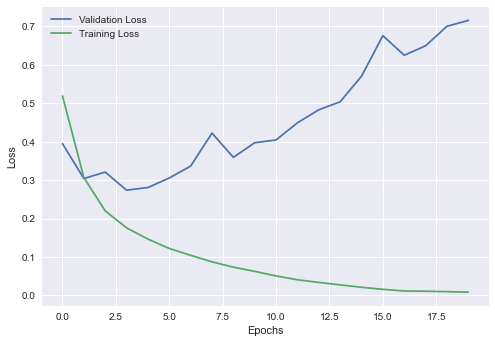

In [34]:
plt.plot(h['val_loss'],label="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# ie, after some epochs our validation loss decreases but after that it starts to increase which basically means overfitting

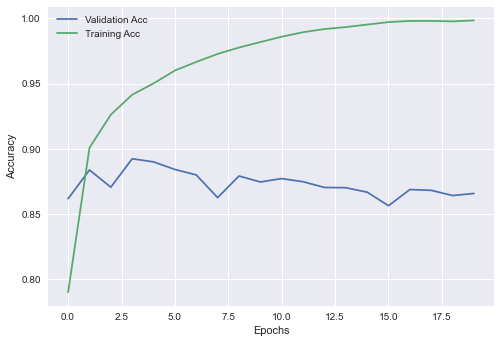

In [35]:
plt.plot(h['val_accuracy'],label="Validation Acc")
plt.plot(h['accuracy'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# after some epochs, validation accuracy starts to decrease---> overfitting
# so now we will stop after some 3-4 epochs called as stop early.

### So now we will run our model for 4 epochs

In [61]:
# when epochs = 4
hist = model.fit(x_train_new, y_train_new,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/4
40/40 [==============================] - 2s 52ms/step - loss: 0.5122 - accuracy: 0.7929 - val_loss: 0.3815 - val_accuracy: 0.8758
Epoch 2/4
40/40 [==============================] - 1s 34ms/step - loss: 0.2942 - accuracy: 0.9063 - val_loss: 0.3491 - val_accuracy: 0.8590
Epoch 3/4
40/40 [==============================] - 2s 39ms/step - loss: 0.2154 - accuracy: 0.9288 - val_loss: 0.2716 - val_accuracy: 0.8918
Epoch 4/4
40/40 [==============================] - 1s 33ms/step - loss: 0.1734 - accuracy: 0.9411 - val_loss: 0.2736 - val_accuracy: 0.8916


In [62]:
h = hist.history

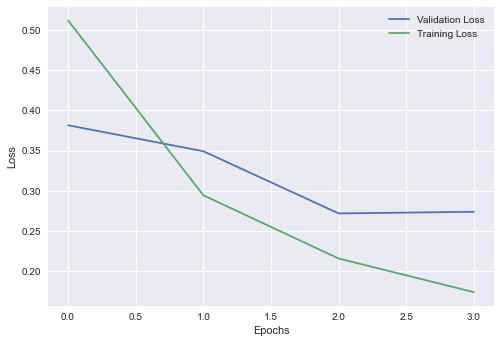

In [63]:
plt.plot(h['val_loss'],label="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

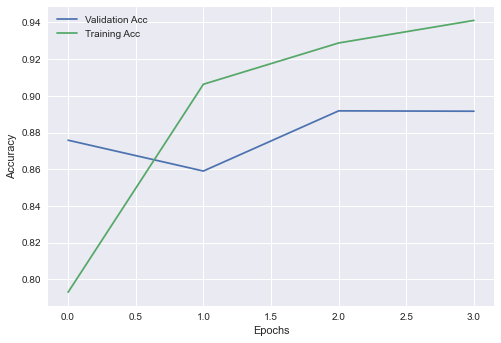

In [64]:
plt.plot(h['val_accuracy'],label="Validation Acc")
plt.plot(h['accuracy'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [65]:
model.evaluate(X_test,Y_test)
# 2nd values is accuracy on test set

782/782 [==============================] - 3s 3ms/step - loss: 0.2959 - accuracy: 0.8820


[0.2959291934967041, 0.8819599747657776]

In [66]:
model.evaluate(X_test,Y_test)[1]

782/782 [==============================] - 3s 3ms/step - loss: 0.2959 - accuracy: 0.8820


0.8819599747657776

In [67]:
model.evaluate(X_train,Y_train)[1]

782/782 [==============================] - 3s 4ms/step - loss: 0.1638 - accuracy: 0.9454


0.9454399943351746

In [68]:
result=model.predict(X_test)
# result basically has the probability of each reviews that by what probability it can be 1

In [69]:
result.shape

(25000, 1)

In [71]:
result[0]
# it says that there is 0.17 probability that it can be a '1' ie positive review.

array([0.17411408], dtype=float32)

In [73]:
result[1]
# it says that there is 0.99 probability that it can be a '1' ie positive review.

array([0.99990356], dtype=float32)